In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

In [18]:
df = pd.read_csv("../data/processed/features_v1.csv")
df = df.drop('Unnamed: 0', axis=1)
df['사업연도'] = df['사업연도'].astype(str)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18354 entries, 0 to 18353
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   사업연도        18354 non-null  object 
 1   회사명         18354 non-null  object 
 2   부채비율        18296 non-null  float64
 3   유동비율        18279 non-null  float64
 4   자기자본비율      18278 non-null  float64
 5   고정자산비율      18228 non-null  float64
 6   고정비율        18196 non-null  float64
 7   순운전자본비율     18257 non-null  float64
 8   ln자산총계      18331 non-null  float64
 9   총자산이익잉여금비율  18023 non-null  float64
 10  ln매출액       17778 non-null  float64
 11  매출액순이익률     17734 non-null  float64
dtypes: float64(10), object(2)
memory usage: 1.7+ MB


In [10]:
plt.rcParams['font.family'] = 'Malgun Gothic'  # Windows의 경우
plt.rcParams['axes.unicode_minus'] = False

### 1. Histogram + Box + Violin Plot (변수 예시: 'ROE')

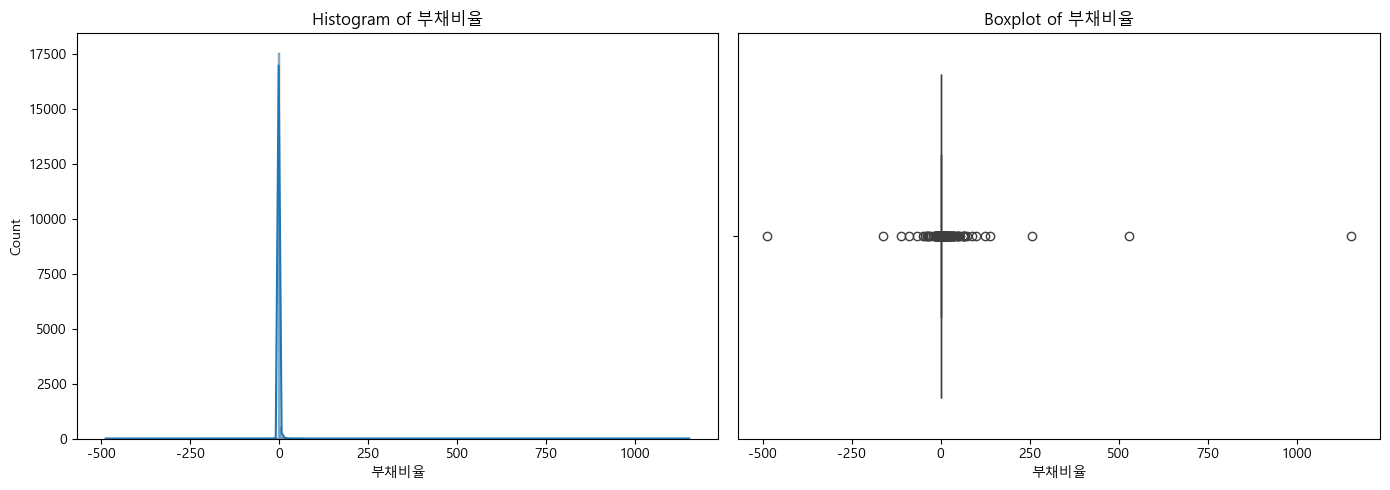

In [19]:
col = '부채비율'

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

sns.histplot(df[col], ax=axes[0], kde=True)
axes[0].set_title(f'Histogram of {col}')

sns.boxplot(x=df[col], ax=axes[1])
axes[1].set_title(f'Boxplot of {col}')

# sns.violinplot(x=df['target'], y=df['ROE'], ax=axes[2])
# axes[2].set_title('Violin Plot: ROE by Target')

plt.tight_layout()
plt.show()

### 2. Q-Q Plot (정규성 검정)

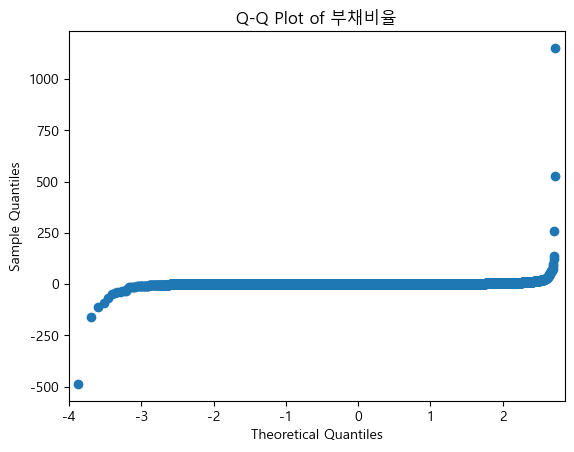

In [20]:
import statsmodels.api as sm

sm.qqplot(df[col], line='s')
plt.title(f"Q-Q Plot of {col}")
plt.show()

### 3. 피어슨 상관계수 Heatmap

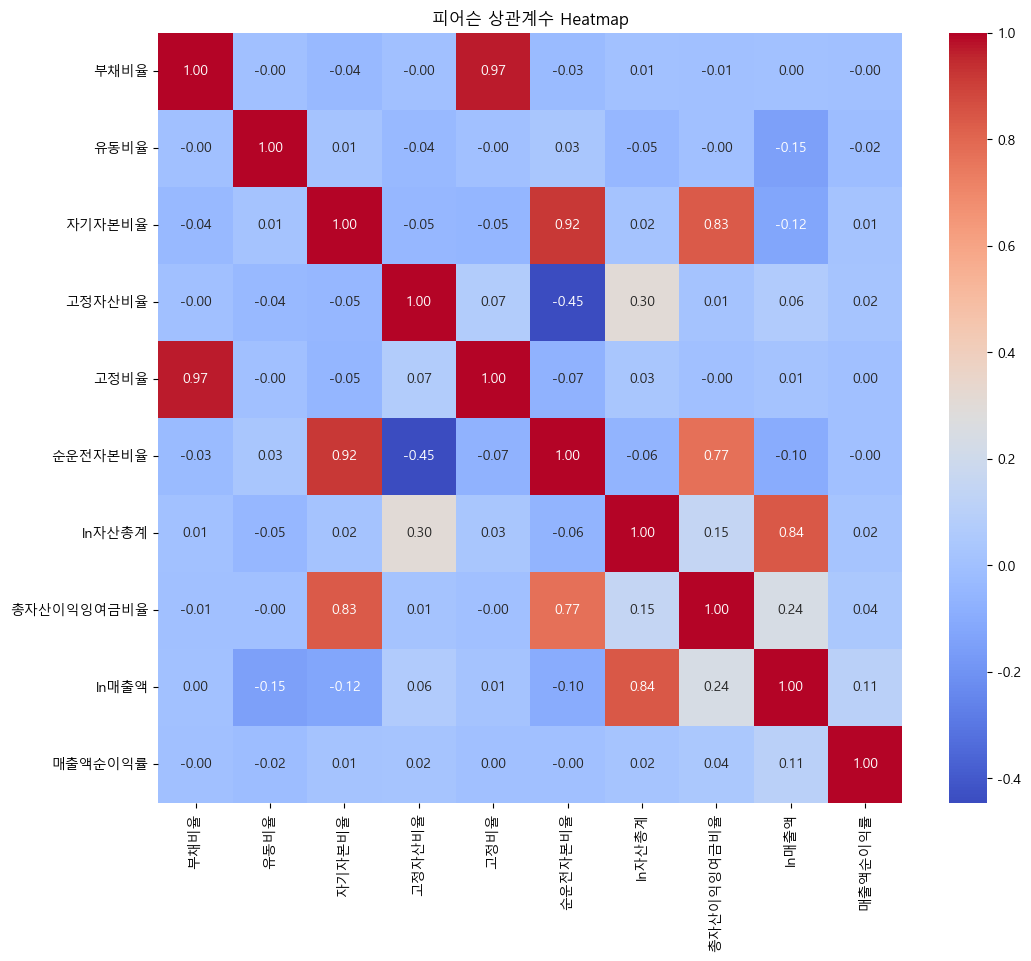

In [21]:
plt.figure(figsize=(12, 10))
numeric_df = df.select_dtypes(include=[np.number])
corr = numeric_df.corr()
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm')
plt.title("피어슨 상관계수 Heatmap")
plt.show()


### 4. t-test (정상 vs 부실 그룹 비교)

In [ ]:
# 정상 vs 부실 그룹
group_0 = df[df['target'] == 0]
group_1 = df[df['target'] == 1]

# 예시: 'ROE' 차이 검정
t_stat, p_val = stats.ttest_ind(group_0['ROE'], group_1['ROE'], equal_var=False)
print(f"t-test 결과 (ROE): t={t_stat:.4f}, p={p_val:.4f}")
